In [1]:
import pandas as pd
import os.path
import geopandas as gpd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the PEP725 dataset

data_dir = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725\pep725_outputs"
dataset = os.path.join(data_dir, 'PEP725_buffers.geojson')
gdf = gpd.read_file(dataset)

# Check the dimensions of the dataframe
gdf.shape

(129329, 14)

## Setting CRS

When importing a GeoJSON in GeoPandas, by default, the it is set to WGS84. 
The buffers file that is trying to be loaded is in WGS84/UTM32N.

For this reason the geometry is set to EPSG:32632 in the next step.
The parameters `inplace` and `allow_override` are set to True to allow replacing the loaded GeoDataFrame and overriding the assumed WGS84 CRS

In [3]:
gdf.set_crs(32632, inplace=True, allow_override=True)

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
0,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,"POLYGON ((825520.468 6003973.720, 825501.207 6..."
1,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,"POLYGON ((401567.206 5732416.903, 401547.945 5..."
2,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,"POLYGON ((481094.080 5488647.767, 481074.819 5..."
3,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,"POLYGON ((474138.525 5538713.881, 474119.264 5..."
4,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,"POLYGON ((423374.473 5728316.443, 423355.212 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129324,5456,13.75000,50.7333,875,864,10000,perm_grass,None,131,2021,244,2021-09-01,M,"POLYGON ((839136.405 5630933.921, 839117.144 5..."
129325,961,7.50000,52.7667,30,33,10000,perm_grass,None,111,2021,257,2021-09-14,M,"POLYGON ((402795.749 5847373.189, 402776.488 5..."
129326,20595,8.50000,49.4667,95,86,10000,perm_grass,None,131,2021,258,2021-09-15,M,"POLYGON ((467771.720 5479458.856, 467752.459 5..."
129327,19312,8.36667,48.6000,490,622,10000,perm_grass,None,131,2021,285,2021-10-12,M,"POLYGON ((457306.954 5383184.811, 457287.692 5..."


In [4]:
gdf_2017 = gdf.loc[gdf.year == 2017].sort_values(by='day', ascending=False)
gdf_2018 = gdf.loc[gdf.year == 2018].sort_values(by='day', ascending=False)
gdf_2019 = gdf.loc[gdf.year == 2019].sort_values(by='day', ascending=False)
gdf_2020 = gdf.loc[gdf.year == 2020].sort_values(by='day', ascending=False)
gdf_2021 = gdf.loc[gdf.year == 2021].sort_values(by='day', ascending=False)

In [36]:
check = gdf_2017.groupby('day').size()
gdf_2017_over_500 = day_counts[day_counts > 500].index



KeyError: False

In [28]:

print(gdf_2017_over_500)

<bound method IndexOpsMixin.value_counts of 23591     345
23589     339
23590     339
23586     338
23587     338
         ... 
3          32
2          31
1          29
0          27
117981      9
Name: day, Length: 26932, dtype: int64>


In [29]:
result = gdf_2017_over_500.gt(500)

AttributeError: 'function' object has no attribute 'gt'

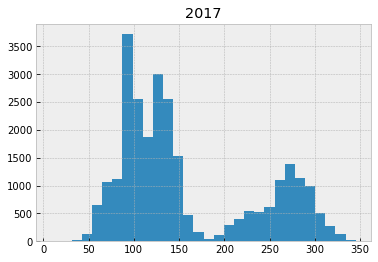

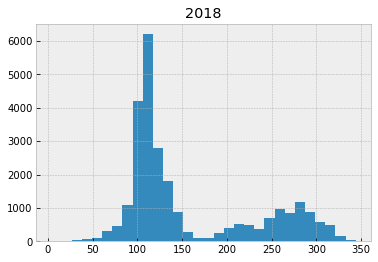

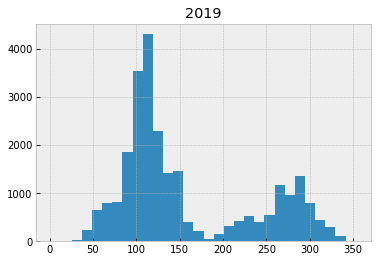

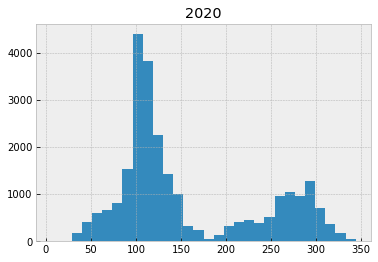

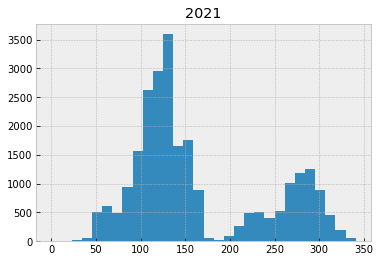

In [15]:
# Individual plots
gdf_2017.hist(column='day', bins=30, grid=True)
plt.title('2017')

gdf_2018.hist(column='day', bins=30, grid=True)
plt.title('2018')
gdf_2019.hist(column='day', bins=30, grid=True)
plt.title('2019')
gdf_2020.hist(column='day', bins=30, grid=True)
plt.title('2020')
gdf_2021.hist(column='day', bins=30, grid=True)
plt.title('2021')
plt.style.use('bmh')
plt.show()

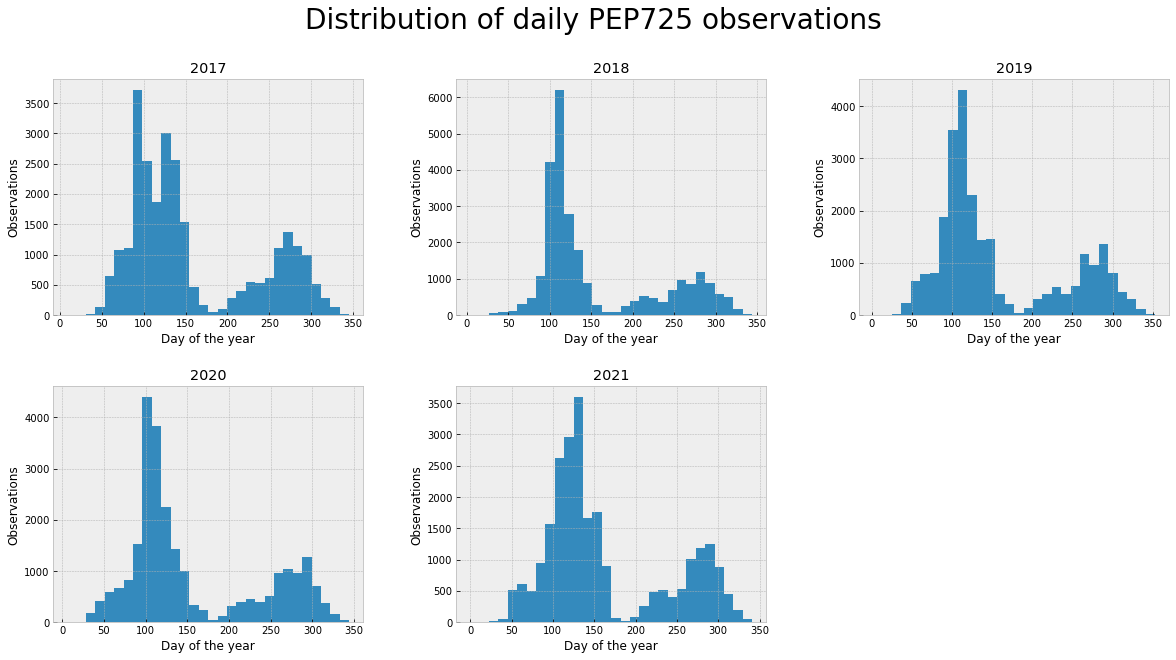

In [16]:
# All plots together
plt.style.use('bmh')
fig, ax = plt.subplots(2,3, figsize=(20,10))
#ax[0,0].set_xlabel('Day of the year')
gdf_2017.hist(column='day', bins=30, grid=True, ax=ax[0,0])
ax[0,0].set_title('2017')
gdf_2018.hist(column='day', bins=30, grid=True, ax=ax[0,1])
ax[0,1].set_title('2018')
gdf_2019.hist(column='day', bins=30, grid=True, ax=ax[0,2])
ax[0,2].set_title('2019')
gdf_2020.hist(column='day', bins=30, grid=True, ax=ax[1,0])
ax[1,0].set_title('2020')
gdf_2021.hist(column='day', bins=30, grid=True, ax=ax[1,1])
ax[1,1].set_title('2021')
fig.delaxes(ax[1,2])
for ax in ax.flat:
    ax.set(xlabel='Day of the year', ylabel='Observations')
plt.suptitle('Distribution of daily PEP725 observations', fontsize=28)

plt.show()

In [18]:
gdf = gdf.loc[gdf.year == 2017].sort_values(by='day', ascending=False)
gdf.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry


array([[<AxesSubplot: title={'center': 'day'}>]], dtype=object)

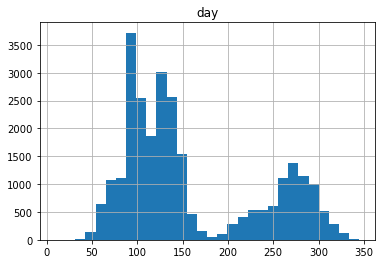

In [14]:
gdf.hist(column='day', bins=30, grid=True)

In [58]:
gdf['day'].value_counts()

92     454
91     449
93     439
100    403
94     400
      ... 
345      1
33       1
34       1
35       1
9        1
Name: day, Length: 311, dtype: int64

In [59]:
buffers_day_92 = gdf.loc[gdf.day == 92]
buffers_day_92.shape

(454, 14)

In [60]:
# Make a function for quick plotting
# Load the lowres map of gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('EPSG:32632')

def germany_plot(geodataframe, basemap):  
    
    # Restrict the boundary to germany
    ax = basemap[basemap.name == 'Germany'].plot(color='gray', figsize=(10,10))
    # Plot the data
    geodataframe.plot(ax=ax, color='green')

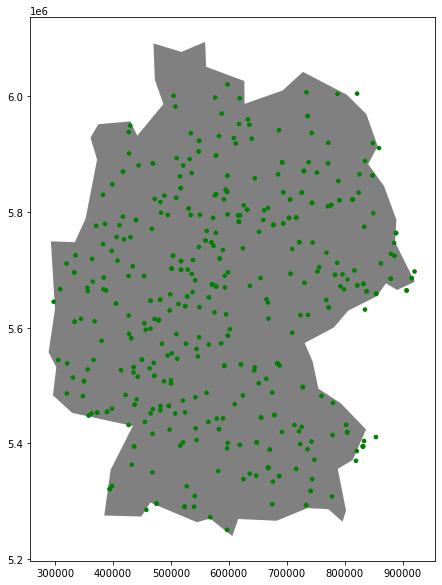

In [61]:
germany_plot(gdf.loc[gdf.day == 92], world)

2017

High Count
- Day 92: April 2
- Day 91: April 1
- Day 93: April 3
- Day 100: April 10

Low Count
- Day 33: February 2
- Day 34: February 3
- Day 345: December 11

In [62]:
output_folder = os.path.join(data_dir, "pep725_high_count_days")

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

buffers_day_92.to_file(os.path.join(output_folder, "buffers_day_92.geojson"), driver='GeoJSON')


In [63]:
buffers_day_92.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
3861,21405,11.81670,53.5833,55,56,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((690450.224 5940850.354, 690430.963 5..."
118778,5054,12.55000,53.0667,50,57,10000,perm_grass,None,182,2017,92,2017-04-02,M,"POLYGON ((741832.253 5885583.114, 741812.992 5..."
113484,19310,6.93333,51.1500,40,42,2030100,Picea,Picea abies,10,2017,92,2017-04-02,EC,"POLYGON ((359457.334 5668536.249, 359438.073 5..."
3851,20640,12.23330,47.9667,475,472,1050100,Alnus,Alnus glutinosa,11,2017,92,2017-04-02,DBL,"POLYGON ((745331.682 5317659.346, 745312.421 5..."
3852,21391,7.13333,50.6333,220,185,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((371991.300 5610710.490, 371972.039 5..."


In [20]:
buffers_day_92 = buffers_day_92_WGS84.to_crs(epsg='32632')

In [49]:
buffers_day_92_WGS84_subset = buffers_day_92_WGS84.iloc[:10]
buffers_day_92_WGS84_subset.set_crs(32632, allow_override=True).to_file(os.path.join(output_folder, "buffers_day_92_WGS84_subset.geojson"),driver='GeoJSON')

In [32]:
buffers_day_92_WGS84_subset.to_crs(32632).geometry.is_valid

3861    False
dtype: bool

In [26]:
buffers_day_92.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
buffers_day_92.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
3861,21405,11.81670,53.5833,55,56,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
118778,5054,12.55000,53.0667,50,57,10000,perm_grass,None,182,2017,92,2017-04-02,M,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
113484,19310,6.93333,51.1500,40,42,2030100,Picea,Picea abies,10,2017,92,2017-04-02,EC,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
3851,20640,12.23330,47.9667,475,472,1050100,Alnus,Alnus glutinosa,11,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
3852,21391,7.13333,50.6333,220,185,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."


In [19]:
buffers_day_92.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Exporting the buffers and stations in WGS84/UTM zone 32N

In [65]:
buffers_day_92.to_file(os.path.join(output_folder, "buffers_day_92.geojson"), driver='GeoJSON')

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Kostas\\Desktop\\GIMA\\Module_7\\Data\\PEP725\\After_2016_sent_from_PEP725\\pep725_outputs\\pep725_high_count_days\\buffers_day_92.geojson'

In [70]:
# Exporting buffers dissolved
buffers_day_92.dissolve(by='s_id').to_file(os.path.join(output_folder, "buffers_day_92_dissolved.geojson"), driver='GeoJSON')

## Exporting the stations for the same day to do some analysis

In [66]:
stations = gpd.read_file(os.path.join(data_dir, "PEP725_stations.geojson"))
stations.set_crs(32632, inplace=True, allow_override=True)

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
0,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000)
1,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (397567.206 5732416.903 60.000)
2,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (477094.080 5488647.767 140.000)
3,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (470138.525 5538713.881 100.000)
4,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (419374.473 5728316.443 60.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129324,5456,13.75000,50.7333,875,864,10000,perm_grass,None,131,2021,244,2021-09-01,M,POINT Z (835136.405 5630933.921 875.000)
129325,961,7.50000,52.7667,30,33,10000,perm_grass,None,111,2021,257,2021-09-14,M,POINT Z (398795.749 5847373.189 30.000)
129326,20595,8.50000,49.4667,95,86,10000,perm_grass,None,131,2021,258,2021-09-15,M,POINT Z (463771.720 5479458.856 95.000)
129327,19312,8.36667,48.6000,490,622,10000,perm_grass,None,131,2021,285,2021-10-12,M,POINT Z (453306.954 5383184.811 490.000)


In [67]:
stations_2017 = stations.loc[stations.year == 2017]
stations_2017.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
0,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000)
1,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (397567.206 5732416.903 60.000)
2,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (477094.080 5488647.767 140.000)
3,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (470138.525 5538713.881 100.000)
4,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (419374.473 5728316.443 60.000)


In [68]:
stations_2017.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
# A station can have many observations, therefore many different points on top of eachother for the same station
# This can be used to create a heatmap that shows where most observations are made
stations_2017.loc[stations_2017.day == 92].to_file(os.path.join(output_folder, "stations_day_92.geojson"), driver='GeoJSON')